## Temperature Forecast Project using ML
Problem Statement:

Data Set Information:

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


Attribute Information:

For more information, read [Cho et al, 2020].
1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

Please note that there are two target variables here: 

1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day  minimum temperature

In [1]:
#Importing required libraries

#importing warnings
import warnings
warnings.filterwarnings("ignore")

# ************** DATA MANIPULATION *****************

#importing pandas and numpy
import pandas as pd
import numpy as np

# ************** DATA VISUALIZATION ****************

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression 

# ************* METRICS ****************************

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score

In [3]:
#To print all columns
pd.set_option('display.max_columns',None)

In [4]:
#importing the dataset using read_csv
df = pd.read_csv("temperature.csv")
df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.000000,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.000000,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.000000,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.000000,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,30-08-2017,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,0.081035,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,30-08-2017,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,0.074962,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,30-08-2017,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,0.059869,0.000000,0.000796,0.000000,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


### Dataset Description
The data set includes information about:

1. station - used weather station number: 1 to 25
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
19. lat - Latitude (Â°): 37.456 to 37.645
20. lon - Longitude (Â°): 126.826 to 127.135
21. DEM - Elevation (m): 12.4 to 212.3
22. Slope - Slope (Â°): 0.1 to 5.2
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
----------------------------------------------------  
In this problem, I have 2 target columns:
1) Next_Tmax: Next day maximum temperature

2) Next_Tmin: Next day minimum temperature

Also, target column data looks continuous. So I can conclude that this project is a **Regression problem**.

## EDA:

In [5]:
#Checking shape of dataset
df.shape

(7752, 25)

There are 7752 rows and 25 columns in my dataset.

In [6]:
#Checking all column names
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

Above are the list if column names in the dataset.

In [7]:
#Checking the data types of all columns
df.dtypes

station             float64
Date                 object
Present_Tmax        float64
Present_Tmin        float64
LDAPS_RHmin         float64
LDAPS_RHmax         float64
LDAPS_Tmax_lapse    float64
LDAPS_Tmin_lapse    float64
LDAPS_WS            float64
LDAPS_LH            float64
LDAPS_CC1           float64
LDAPS_CC2           float64
LDAPS_CC3           float64
LDAPS_CC4           float64
LDAPS_PPT1          float64
LDAPS_PPT2          float64
LDAPS_PPT3          float64
LDAPS_PPT4          float64
lat                 float64
lon                 float64
DEM                 float64
Slope               float64
Solar radiation     float64
Next_Tmax           float64
Next_Tmin           float64
dtype: object

Except Date all other columns are float type data.

In [8]:
#Checking the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


I can observe in some columns of the dataset i have null values.

In [9]:
#Checking unique values of each column
df.nunique()

station               25
Date                 310
Present_Tmax         167
Present_Tmin         155
LDAPS_RHmin         7672
LDAPS_RHmax         7664
LDAPS_Tmax_lapse    7675
LDAPS_Tmin_lapse    7675
LDAPS_WS            7675
LDAPS_LH            7675
LDAPS_CC1           7569
LDAPS_CC2           7582
LDAPS_CC3           7599
LDAPS_CC4           7524
LDAPS_PPT1          2812
LDAPS_PPT2          2510
LDAPS_PPT3          2356
LDAPS_PPT4          1918
lat                   12
lon                   25
DEM                   25
Slope                 27
Solar radiation     1575
Next_Tmax            183
Next_Tmin            157
dtype: int64

Above are the unique value count of each column.

In [10]:
#Lets check the value count of each column to see if there are any unexpected and unwanted entries present in the column.
for i in df.columns:
        print(df[i].value_counts())
        print('****************************************')

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
****************************************
30-07-2017    25
11-08-2014    25
21-07-2017    25
20-07-2013    25
03-07-2016    25
              ..
23-08-2014    25
06-08-2014    25
07-07-2013    25
09-07-2013    25
29-08-2014    25
Name: Date, Length: 310, dtype: int64
****************************************
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64
****************************************
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_

Above are the value counts of each columns.In LDAPS_CC2 column, LDAPS_CC3, LDAPS_CC4, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3 and LDAPS_PPT4 columns there are more zero values.

**I tried replacing zeros in LDAPS_PPT1, LDAPS_PPT1, LDAPS_PPT2, LDAPS_PPT3, LDAPS_PPT4 but the accuracy of the model reduced which means these zero inputs are important for model building so i'm keeping them as it is.**

In [11]:
#Checking null values in the dataset
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

I can see null values in all the columns except lat, lon, DEM, Slope, Solar radiation colums.And i can notice in station and Date column there are only two null values so let me have a look into unique count of those columns.

In [12]:
#lets check the unique values in station column
df['station'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., nan])

In [13]:
#lets check the unique values in Date column
df['Date'].unique()

array(['30-06-2013', '01-07-2013', '02-07-2013', '03-07-2013',
       '04-07-2013', '05-07-2013', '06-07-2013', '07-07-2013',
       '08-07-2013', '09-07-2013', '10-07-2013', '11-07-2013',
       '12-07-2013', '13-07-2013', '14-07-2013', '15-07-2013',
       '16-07-2013', '17-07-2013', '18-07-2013', '19-07-2013',
       '20-07-2013', '21-07-2013', '22-07-2013', '23-07-2013',
       '24-07-2013', '25-07-2013', '26-07-2013', '27-07-2013',
       '28-07-2013', '29-07-2013', '30-07-2013', '31-07-2013',
       '01-08-2013', '02-08-2013', '03-08-2013', '04-08-2013',
       '05-08-2013', '06-08-2013', '07-08-2013', '08-08-2013',
       '09-08-2013', '10-08-2013', '11-08-2013', '12-08-2013',
       '13-08-2013', '14-08-2013', '15-08-2013', '16-08-2013',
       '17-08-2013', '18-08-2013', '19-08-2013', '20-08-2013',
       '21-08-2013', '22-08-2013', '23-08-2013', '24-08-2013',
       '25-08-2013', '26-08-2013', '27-08-2013', '28-08-2013',
       '29-08-2013', '30-08-2013', '30-06-2014', '01-07

So it looks like the data is collected for about 25 stations and the last 2 entries are nan values,so i can replace them with station 1 and 2 considering the entries of next day.And the nan value in Date column can be replaced by continuation of dates like 31-08-2017. 

In [14]:
# Lets replace the null values in station column
df['station'].iloc[7750] = 1.0
df['station'].iloc[7751] = 2.0

In [15]:
#lets replace null values in 'Date' column
df['Date'].iloc[7750] = '31-08-2017'
df['Date'].iloc[7751] = '31-08-2017'

# Feature Engineering:

In [16]:
df["Date"]=pd.to_datetime(df["Date"])

In [17]:
#Extracting Year, month and date from Date column
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day

Succesfully extracted date, month and year from Date column.

In [18]:
#Printing dataset
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2,2013,6,30
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5,2013,6,30
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9,2013,6,30
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3,2013,6,30
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5,2013,6,30


After extraction i can drop Date column.

In [19]:
#Droping Date column
df = df.drop(["Date"],axis=1)

In [20]:
#Checking null values in the dataset
df.isnull().sum()

station              0
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Year                 0
Month                0
Day                  0
dtype: int64

So the nan values in station and Date column are replaced.Let me replace nan values in other columns. 

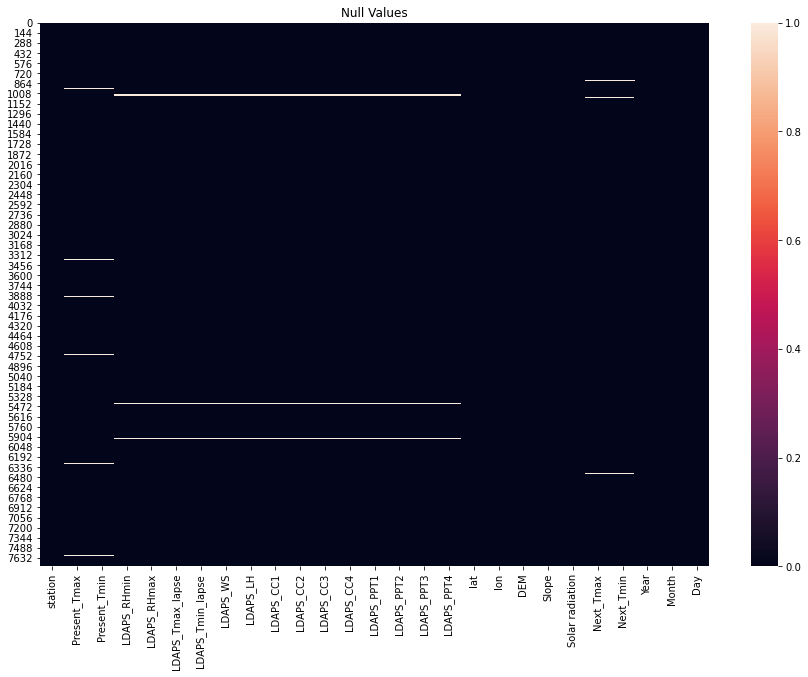

In [21]:
#Visualizeing null values
plt.figure(figsize=[15,10])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

I can see the null values clearly now.

# Imputaion method to replace nan values:

In [22]:
#Checking for skewness
df.skew()

station             0.000182
Present_Tmax       -0.262942
Present_Tmin       -0.365875
LDAPS_RHmin         0.298765
LDAPS_RHmax        -0.850870
LDAPS_Tmax_lapse   -0.226775
LDAPS_Tmin_lapse   -0.578943
LDAPS_WS            1.571581
LDAPS_LH            0.670491
LDAPS_CC1           0.457231
LDAPS_CC2           0.470060
LDAPS_CC3           0.637630
LDAPS_CC4           0.663251
LDAPS_PPT1          5.367675
LDAPS_PPT2          5.747360
LDAPS_PPT3          6.425829
LDAPS_PPT4          6.792379
lat                 0.087062
lon                -0.285213
DEM                 1.723257
Slope               1.563020
Solar radiation    -0.511210
Next_Tmax          -0.339607
Next_Tmin          -0.403743
Year               -0.000365
Month              -0.705586
Day                 0.245283
dtype: float64

In [23]:
#Replacing nan values in columns having skewness
df["LDAPS_RHmax"] = df["LDAPS_RHmax"].fillna(df["LDAPS_RHmax"].median())
df["LDAPS_Tmin_lapse"] = df["LDAPS_Tmin_lapse"].fillna(df["LDAPS_Tmin_lapse"].median())
df["LDAPS_WS"] = df["LDAPS_WS"].fillna(df["LDAPS_WS"].median())
df["LDAPS_LH"] = df["LDAPS_LH"].fillna(df["LDAPS_LH"].median())
df["LDAPS_CC3"] = df["LDAPS_CC3"].fillna(df["LDAPS_CC3"].median())
df["LDAPS_CC4"] = df["LDAPS_CC4"].fillna(df["LDAPS_CC4"].median())
df["LDAPS_PPT1"] = df["LDAPS_PPT1"].fillna(df["LDAPS_PPT1"].median())
df["LDAPS_PPT2"] = df["LDAPS_PPT2"].fillna(df["LDAPS_PPT2"].median())
df["LDAPS_PPT3"] = df["LDAPS_PPT3"].fillna(df["LDAPS_PPT3"].median())
df["LDAPS_PPT4"] = df["LDAPS_PPT4"].fillna(df["LDAPS_PPT4"].median())

In [24]:
#Replacing nan values in columns without skewness
df["Present_Tmax"] = df["Present_Tmax"].fillna(df["Present_Tmax"].mean())
df["Present_Tmin"] = df["Present_Tmin"].fillna(df["Present_Tmin"].mean())
df["LDAPS_RHmin"] = df["LDAPS_RHmin"].fillna(df["LDAPS_RHmin"].mean())
df["LDAPS_Tmax_lapse"] = df["LDAPS_Tmax_lapse"].fillna(df["LDAPS_Tmax_lapse"].mean())
df["LDAPS_CC1"] = df["LDAPS_CC1"].fillna(df["LDAPS_CC1"].mean())
df["LDAPS_CC2"] = df["LDAPS_CC2"].fillna(df["LDAPS_CC2"].mean())
df["Next_Tmax"] = df["Next_Tmax"].fillna(df["Next_Tmax"].mean())
df["Next_Tmin"] = df["Next_Tmin"].fillna(df["Next_Tmin"].mean())

I have replaced all the nan values.

In [25]:
#Checking null values in the dataset again
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

Now all the null values has been replaced.

**If the column entries in the dataset are consecutive it will create problem while building the model so let me shuffel the data.**

In [26]:
#Shuffeling the dataset
from sklearn.utils import shuffle
df = shuffle(df)
df.reset_index(inplace = True)
df

,index,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,6912,13.0,26.2,24.4,57.686661,87.404343,30.278578,24.785797,6.049209,34.983898,0.690685,0.598400,0.354190,0.313627,0.000000,0.000000,0.000000,0.000000,37.5776,127.083,59.8324,2.6865,5480.263184,30.1,25.3,2017,7,28
1,3432,8.0,24.7,21.0,54.808281,95.347588,29.199145,21.716700,7.996540,56.180297,0.262600,0.067640,0.000000,0.034397,0.000000,0.000000,0.000000,0.000000,37.4697,126.910,52.5180,1.5629,5746.332520,29.4,21.8,2015,7,13
2,348,24.0,26.0,22.5,85.910294,93.952065,26.560680,24.911676,9.644189,40.451319,0.895707,0.821294,0.806866,0.589804,3.559208,0.349109,0.264247,0.000000,37.5237,126.909,17.2956,0.2223,5734.145996,26.0,23.5,2013,7,13
3,5775,1.0,27.5,24.7,59.852615,95.949127,31.288175,24.056134,5.830940,92.381680,0.037045,0.148402,0.176586,0.517607,0.000000,0.000000,0.044569,0.000000,37.6046,126.991,212.3350,2.7850,5152.121094,31.0,23.6,2016,8,14
4,3726,2.0,25.1,23.5,71.625259,94.188408,28.194251,24.166193,6.455965,39.193664,0.835210,0.719569,0.302688,0.041246,0.378320,1.374943,0.000000,0.000000,37.6046,127.032,44.7624,0.5141,5558.630371,29.8,23.0,2015,7,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,2856,7.0,25.0,21.9,67.509499,96.978615,26.574633,22.086914,5.807013,85.180073,0.403736,0.317921,0.111483,0.164250,0.005184,0.000000,0.000000,0.000000,37.5776,126.838,12.3700,0.0985,4780.342773,28.0,21.5,2014,8,21
7748,7703,4.0,23.5,18.3,54.885128,92.451164,20.972841,14.443233,6.894041,87.593592,0.589908,0.651899,0.450424,0.060317,0.000000,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.5348,4488.110840,23.0,16.5,2017,8,29
7749,3167,18.0,29.6,20.9,30.808048,91.362488,27.660704,19.682235,8.145601,109.912542,0.055933,0.000000,0.002386,0.000000,0.093864,0.000000,0.000000,0.000000,37.4832,127.024,56.4448,1.2313,5853.381836,28.1,19.9,2015,2,7
7750,5335,11.0,28.9,25.7,53.688702,94.197403,30.560765,24.641134,7.232534,70.499383,0.675010,0.560041,0.076511,0.019608,1.481108,1.706424,0.000000,0.000000,37.5372,127.085,28.7000,0.6233,5493.429199,31.2,24.6,2016,7,27


This is the dataset after shuffeling.

In [27]:
#lets drop the index column
df.drop(columns = 'index', inplace = True)

In [28]:
df.head()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,13.0,26.2,24.4,57.686661,87.404343,30.278578,24.785797,6.049209,34.983898,0.690685,0.598400,0.354190,0.313627,0.000000,0.000000,0.000000,0.0,37.5776,127.083,59.8324,2.6865,5480.263184,30.1,25.3,2017,7,28
1,8.0,24.7,21.0,54.808281,95.347588,29.199145,21.716700,7.996540,56.180297,0.262600,0.067640,0.000000,0.034397,0.000000,0.000000,0.000000,0.0,37.4697,126.910,52.5180,1.5629,5746.332520,29.4,21.8,2015,7,13
2,24.0,26.0,22.5,85.910294,93.952065,26.560680,24.911676,9.644189,40.451319,0.895707,0.821294,0.806866,0.589804,3.559208,0.349109,0.264247,0.0,37.5237,126.909,17.2956,0.2223,5734.145996,26.0,23.5,2013,7,13
3,1.0,27.5,24.7,59.852615,95.949127,31.288175,24.056134,5.830940,92.381680,0.037045,0.148402,0.176586,0.517607,0.000000,0.000000,0.044569,0.0,37.6046,126.991,212.3350,2.7850,5152.121094,31.0,23.6,2016,8,14
4,2.0,25.1,23.5,71.625259,94.188408,28.194251,24.166193,6.455965,39.193664,0.835210,0.719569,0.302688,0.041246,0.378320,1.374943,0.000000,0.0,37.6046,127.032,44.7624,0.5141,5558.630371,29.8,23.0,2015,7,25


In [29]:
#Checking for empty observations
df.loc[df['Next_Tmax'] == " "]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day


There is no empty observation in Next_Tmax column.

In [30]:
#Checking for empty observations
df.loc[df['Next_Tmin'] == " "]

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day


There is no empty observation in Next_Tmax column.

In [31]:
#Checking description of data set
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
count,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000
mean,12.997033,29.768211,23.225059,56.759372,88.388529,29.613447,23.514984,7.092549,62.450457,0.368774,0.356080,0.317864,0.298499,0.586267,0.480310,0.275508,0.266801,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220,2015.000516,7.080882,16.374742
std,7.213007,2.956557,2.403036,14.596973,7.158471,2.932898,2.334099,2.173913,33.571540,0.261185,0.256810,0.249208,0.253211,1.937198,1.754900,1.156495,1.200654,0.050352,0.079435,54.279780,1.370444,429.158867,3.122557,2.483276,1.414487,2.238124,8.243617
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000,2013.000000,1.000000,7.000000
25%,7.000000,27.800000,21.700000,46.046162,84.316923,27.693091,22.114651,5.686487,37.532764,0.148321,0.142328,0.103100,0.082741,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.400000,2014.000000,7.000000,8.000000
50%,13.000000,29.900000,23.400000,55.313244,89.793480,29.662273,23.760199,6.547470,56.865482,0.320110,0.315667,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000,2015.000000,7.000000,16.000000
75%,19.000000,32.000000,24.900000,67.038254,93.704500,31.683819,25.134000,8.007471,83.904586,0.571696,0.554963,0.494007,0.497230,0.049122,0.016748,0.007231,0.000000,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000,2016.000000,8.000000,24.000000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000,2017.000000,12.000000,31.000000


Above is the statistics about the dataset.The mean and the 2nd quantile values are almost same so there is no extreme outliers in the dataset.

# Visualization:

# Univariate Analysis:

In [32]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

[]


There is no categorical column in the dataset.

In [33]:
# Now checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'Year', 'Month', 'Day']


Above all are numerical columns so let me replace the nan values with median if there is skewness and mean if there is no skewness. 

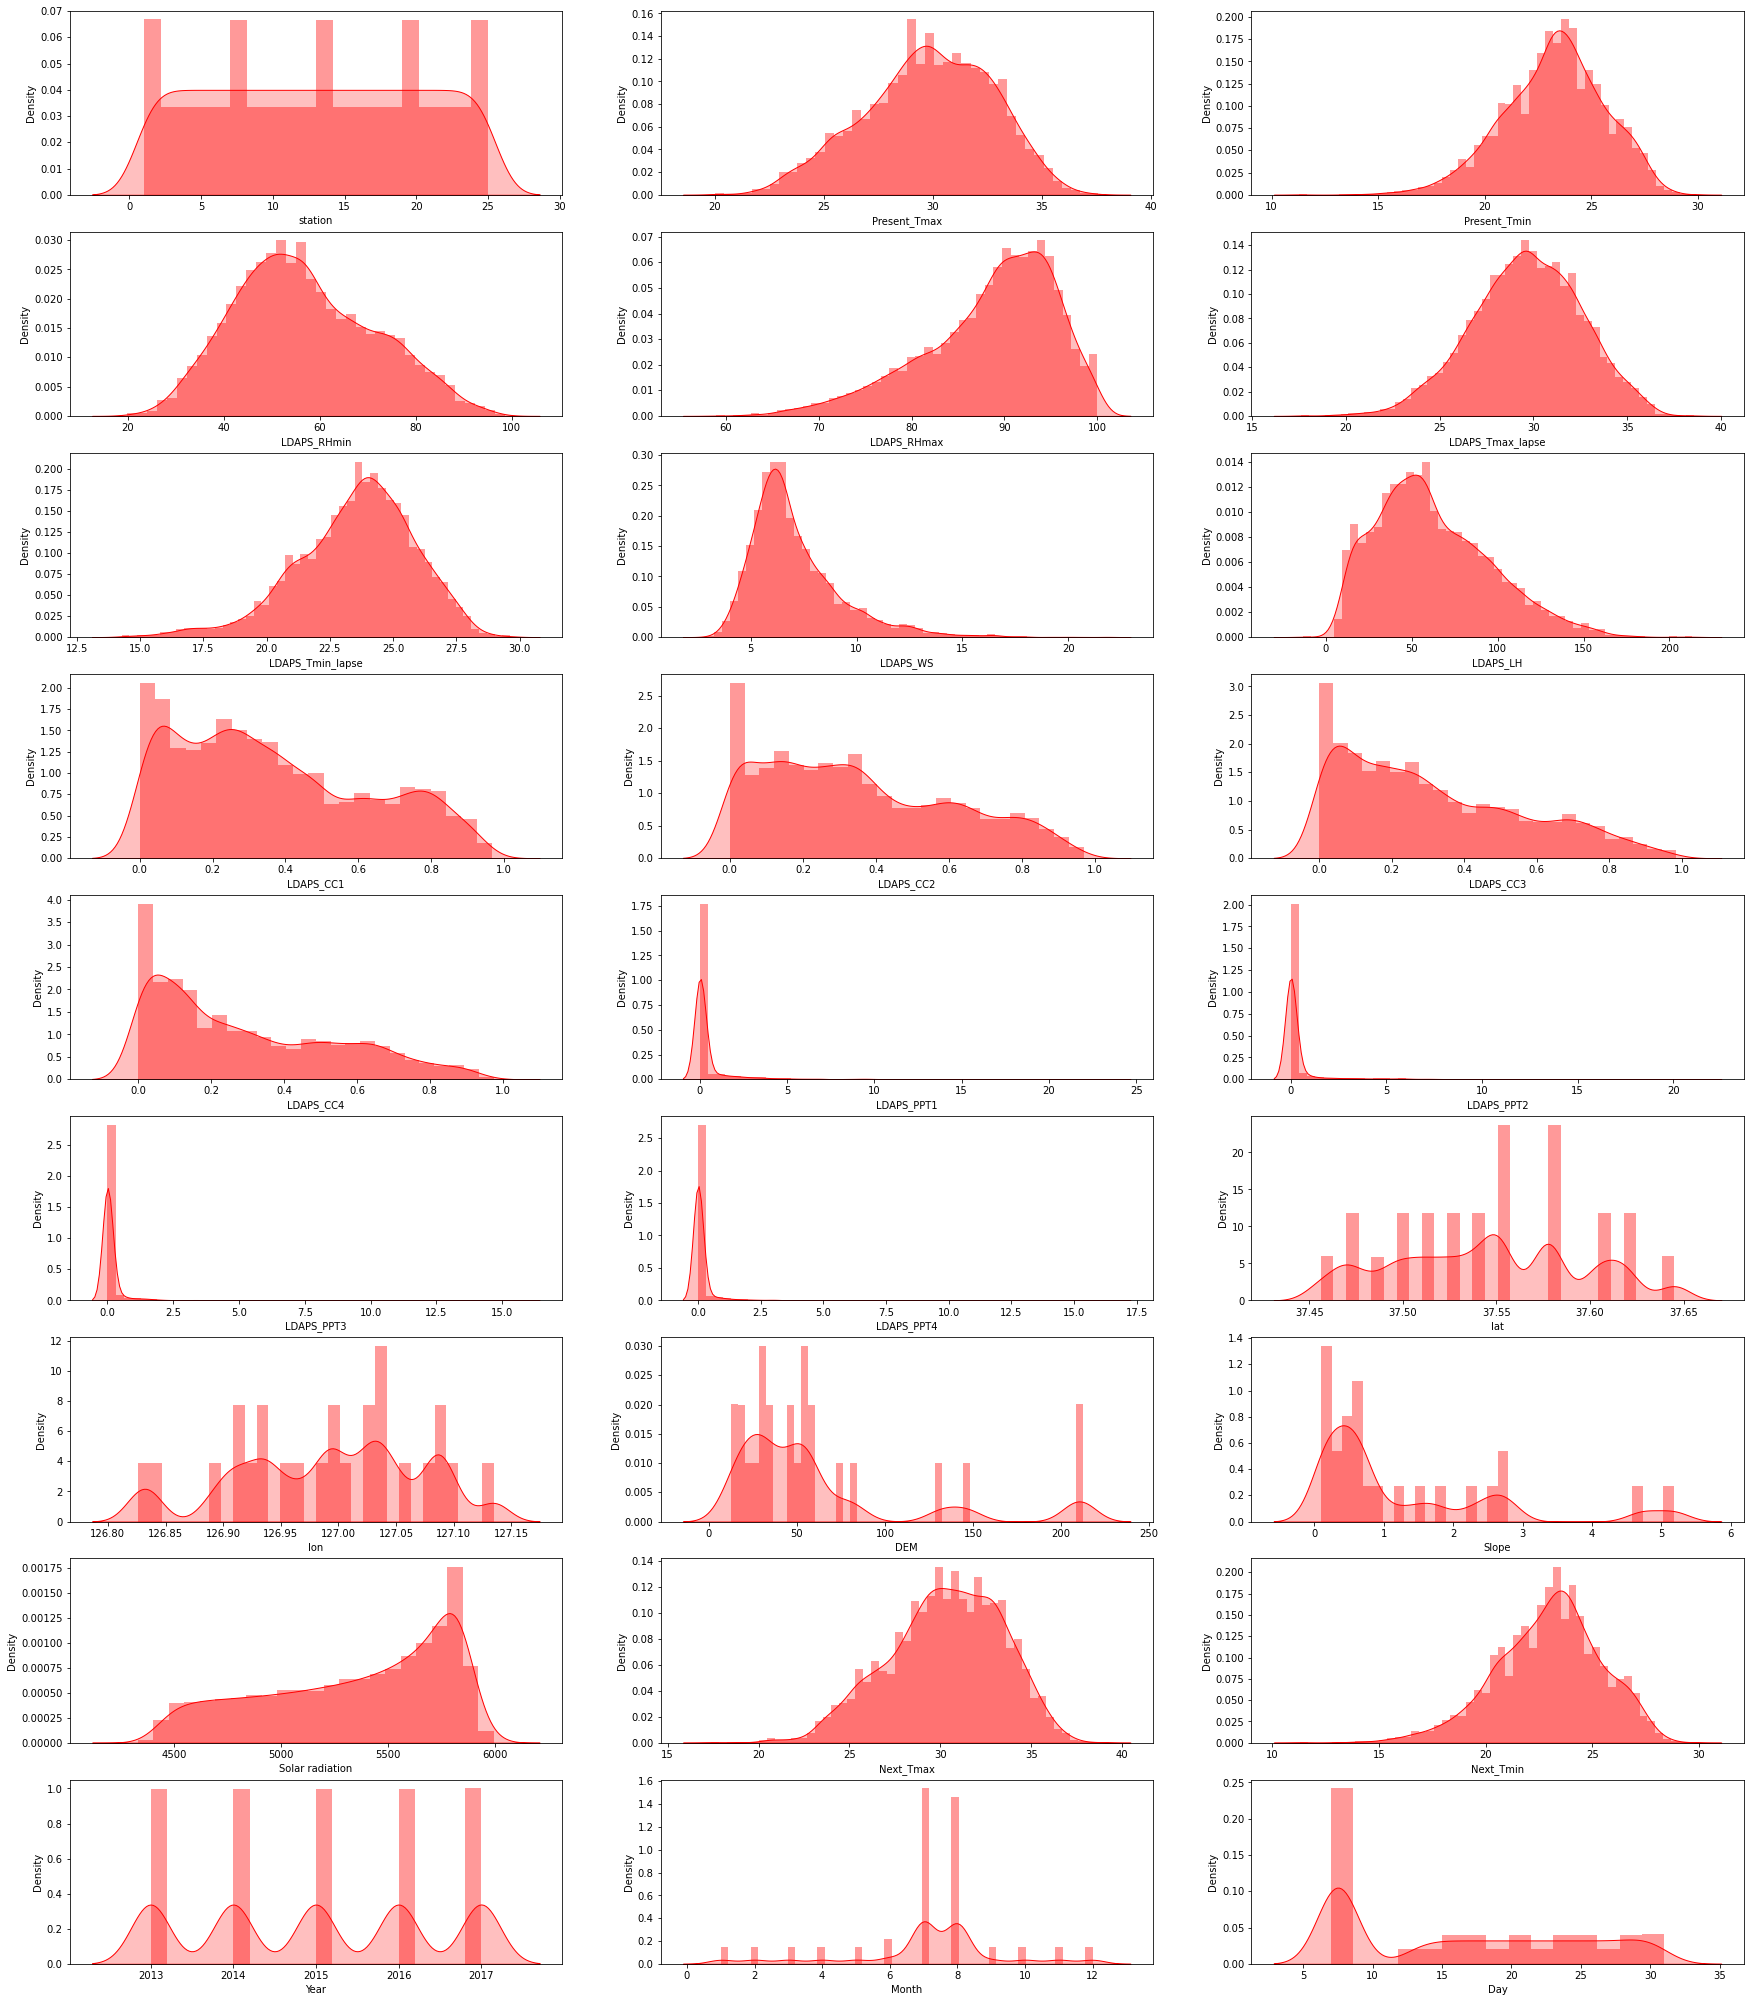

In [34]:
#Distribution plot for all numerical columns
plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in df[numerical_columns]:
    if plotnumber<=30:
        ax = plt.subplot(10,3,plotnumber)
        sns.distplot(df[column],color='r',kde_kws={"shade": True},hist=True)
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

Above are the dist plots all the columns, I can observe there is skewness in most of the columns i have remove that.

# Bivariate Analysis:

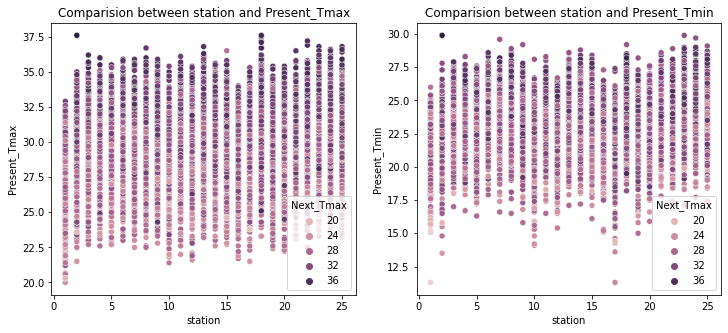

In [35]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.scatterplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.scatterplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmax']);
plt.show()

- In the above plot i can see that as the Present_Tmax is increasing the Next_Tmax is also increasing irrespective of station.
- And also in 2nd plot as Present_Tmin is increasing then Next_Tmax is also increasing.

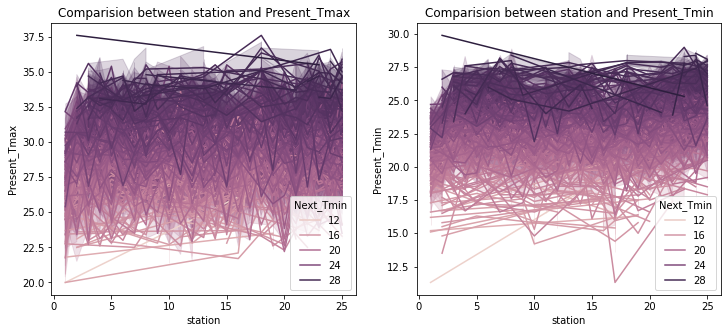

In [36]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between station and Present_Tmax')
sns.lineplot(df['station'],df['Present_Tmax'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between station and Present_Tmin')
sns.lineplot(df['station'],df['Present_Tmin'],hue=df['Next_Tmin']);
plt.show()

- The graph is almost irregular but I can observe dark purple color in the range of 30 to 35 in Present_Tmax and Present_Tmin which means Next_Tmin is more here in all the stations.

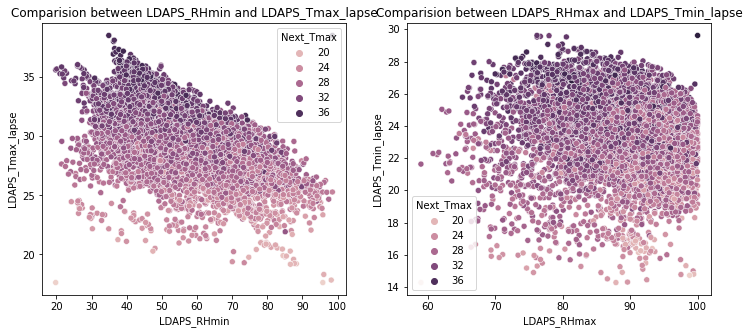

In [37]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.scatterplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.scatterplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmax']);
plt.show()

- In first plot i can observe a linear decrese in lapse with RHmin and also Next_Tmax is also decresing with the curve.
- In second plot no proper pattern is observed.

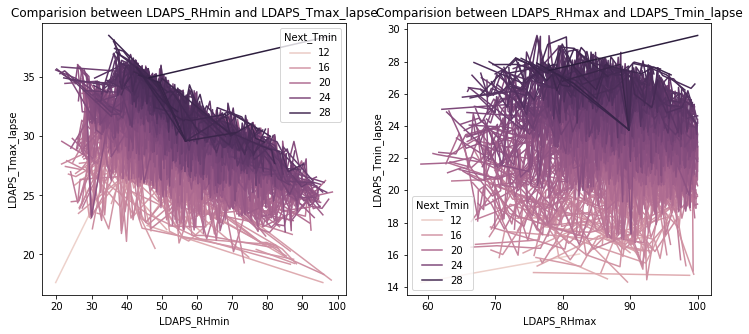

In [38]:
#Comparision between features using line plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_RHmin and LDAPS_Tmax_lapse')
sns.lineplot(df['LDAPS_RHmin'],df['LDAPS_Tmax_lapse'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_RHmax and LDAPS_Tmin_lapse')
sns.lineplot(df['LDAPS_RHmax'],df['LDAPS_Tmin_lapse'],hue=df['Next_Tmin']);
plt.show()

- In both the graphs there are some outliers.
- The color is getting dark as lapse and RHmax is incresing in 2nd graph.
- In first graph it is showing linear decreseing curve.

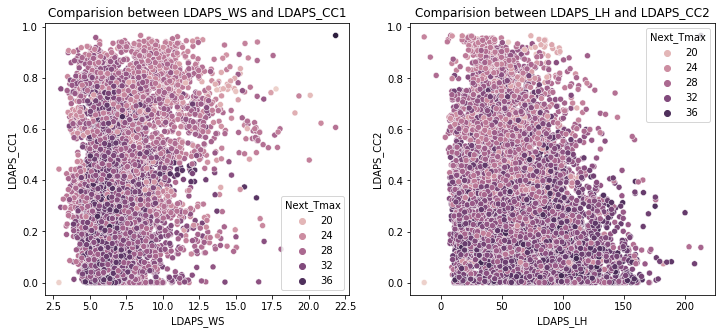

In [39]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC1')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC1'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC2')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC2'],hue=df['Next_Tmax']);
plt.show()

- In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.
- But no proper pattern is observed.

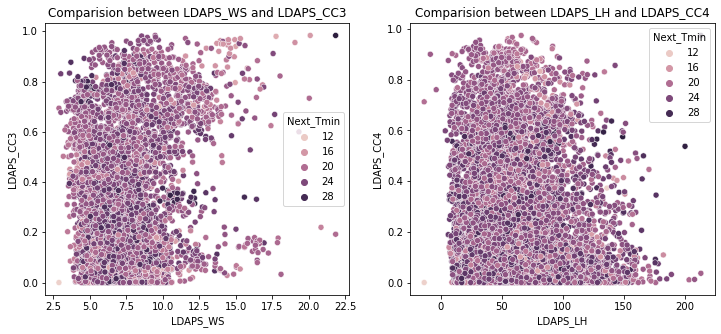

In [40]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_WS and LDAPS_CC3')
sns.scatterplot(df['LDAPS_WS'],df['LDAPS_CC3'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_LH and LDAPS_CC4')
sns.scatterplot(df['LDAPS_LH'],df['LDAPS_CC4'],hue=df['Next_Tmin']);
plt.show()

- In this perticular plot most of the points are lying between 5-10 LDAPS_WS and in LDAPS_LH 0-150.
- But no proper pattern is observed.

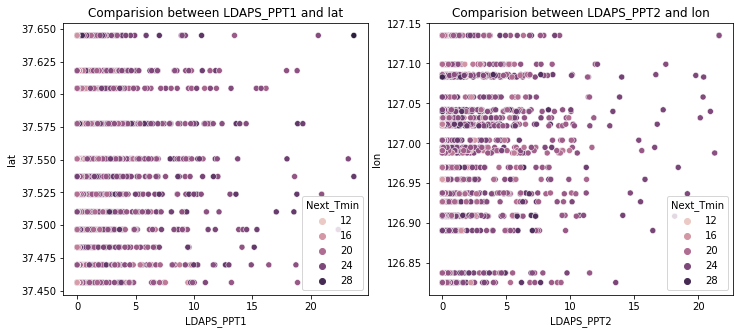

In [41]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT1 and lat')
sns.scatterplot(df['LDAPS_PPT1'],df['lat'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT2 and lon')
sns.scatterplot(df['LDAPS_PPT2'],df['lon'],hue=df['Next_Tmin']);
plt.show()

In this graph also i can not observe any patterens.

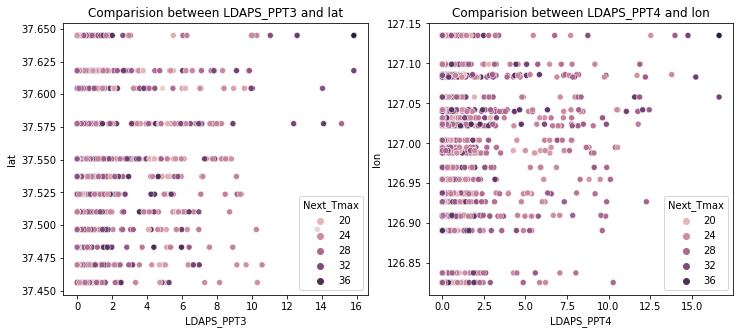

In [42]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between LDAPS_PPT3 and lat')
sns.scatterplot(df['LDAPS_PPT3'],df['lat'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between LDAPS_PPT4 and lon')
sns.scatterplot(df['LDAPS_PPT4'],df['lon'],hue=df['Next_Tmax']);
plt.show()

- I can say that lat and lon are just geometrical features they do not have any proper relationship with our features.

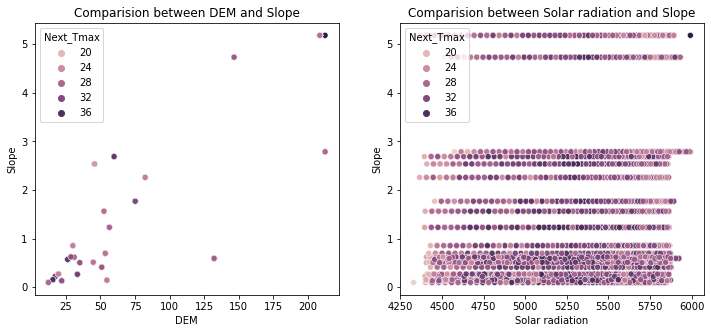

In [43]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between DEM and Slope')
sns.scatterplot(df['DEM'],df['Slope'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Solar radiation and Slope')
sns.scatterplot(df['Solar radiation'],df['Slope'],hue=df['Next_Tmax']);
plt.show()

- In first plot there is no patteren at all.
- In 2nd plot I can notice that there is no solar radiation in between the slope 3 to 4.5.

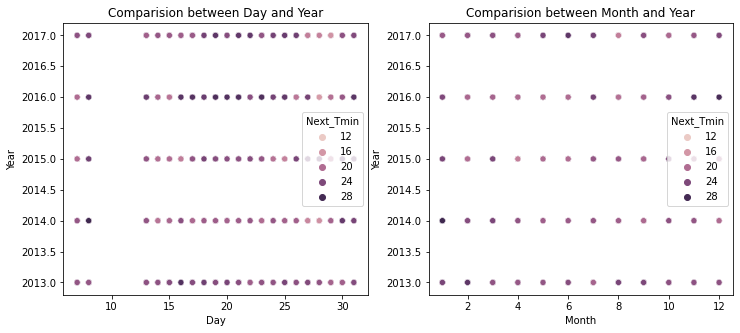

In [44]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmin']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmin']);
plt.show()

- In first graph i can notice that 6 to 13 day there is no temperature noted.
- In second graph it looks setteled.

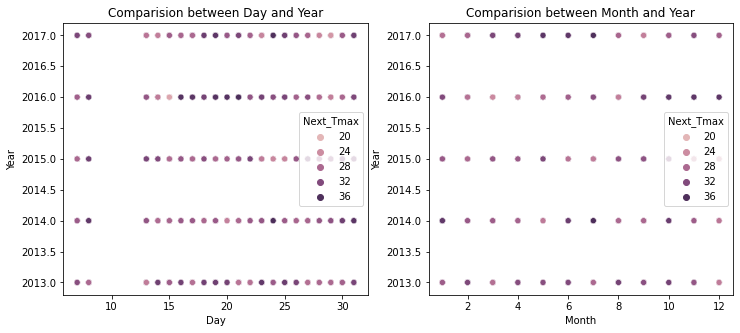

In [45]:
#Comparision between features using scatter plot
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.title('Comparision between Day and Year')
sns.scatterplot(df['Day'],df['Year'],hue=df['Next_Tmax']);
plt.subplot(1, 2, 2)
plt.title('Comparision between Month and Year')
sns.scatterplot(df['Month'],df['Year'],hue=df['Next_Tmax']);
plt.show()

- In first graph i can notice that 6 to 13 day there is no temperature noted.
- In second graph it looks setteled.

# Multivariate Analysis:

In [ ]:
#pair ploting for df
sns.pairplot(df,hue="Next_Tmax")

Above are the pair plots of pair of features for Next_Tmax as target.And i can say that there are outliers in the dataset. 

# Checking for outliers:

In [ ]:
# Identifying the outliers using boxplot

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_columns:
    if plotnumber<=30:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

There are outliers in:
- Present_Tmax
- Present_Tmin
- LDAPS_RHmax
- LDAPS_Tmax_lapse
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Month
- Next_Tmax
- Next_Tmin


**But i should not remove outliers in target column.**

# Removing outliers:

# i) Zscore Method:

In [ ]:
#Features having outliers
features=df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Month']]

Above are the list of columns with outliers.

In [ ]:
from scipy.stats import zscore
z=np.abs(zscore(features))
df_new=df[(z<3).all(axis=1)]
df_new

I have removed the skewness using zscore method.

In [ ]:
#Checking shape of new dataset
df_new.shape

In my new dataset i have 6907 rows and 27 columns.

In [ ]:
#Checking shape of old dataset
df.shape

In my old dataset i was having 7752 rows and 27 columns.

In [ ]:
#Checking dataloss in zscore method
Dataloss = (((7752-6907)/7752)*100)
Dataloss

Using zscore i'm getting 10.90% dataloss.So let me not remove any outliers from the dataset.But still let me have a look into IQR method also.

# ii) IQR method:

In [ ]:
# 1st quantile
Q1=features.quantile(0.25)

# 3rd quantile
Q3=features.quantile(0.75)

# IQR
IQR=Q3 - Q1

df_1=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

I have removed the skewness using IQR method.

In [ ]:
#Checking shape of new dataset
df_1.shape

In my new dataset i have 2413 rows and 27 columns.

In [ ]:
#Checking shape of old dataset
df.shape

In my old dataset i was having 7752 rows and 27 columns.

In [ ]:
#Checking dataloss in IQR
Dataloss = (((7752-2413)/7752)*100)
Dataloss

There is a huge dataloss in IQR method.So it is better not to remove any outliers.

# Checking the correlation using heat map:

In [ ]:
cor=df.corr()

Checking correlation.

In [ ]:
cor

Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

In [ ]:
# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

- By looking into the heat map i can say that there is multicolinearity issue.
- By looking into the correlation of target column with other features i can say that Next_Tmax has good correlation compared to Next_Tmin.
- **Let me plot a bar graph to get better insight on targets.**

# i) Prediction and model building for target Next_Tmax:

First let me consider Next_Tmax as target and build the model.

# Separating features and label:

In [ ]:
x = df.drop("Next_Tmax",axis=1)
y = df["Next_Tmax"]

Assigned y as target variable and x as remaining features.

## Bar plot for correlations of Next_Tmax column with other features:

In [ ]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmax'].sort_values(ascending=False).drop(['Next_Tmax']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [ ]:
#Checking for skewness
x.skew()

The skewed columns are:
- LDAPS_RHmax
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_CC3
- LDAPS_CC4
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Solar radiation
- Month

# Removing skewness using yeo-johnson:

In [ ]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

Using yeo-johnson to remove skewness.

In [ ]:
#Removing skewness using yeo-johnson
x[skew_fea] = scaler.fit_transform(x[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [ ]:
#Checking skewness after removing skewness
x[skew_fea].skew()

The skewness has been reduced in all the columns.I have tried working on log, log1p, sqrt, cbrt and box-cox i found Yeo-johnson as best method in all the methods the skewness is not reducing at all.So i found Yeo-johnson as best method.

In [ ]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [ ]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms=MinMaxScaler()
X = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["Next_Tmin"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_Tmax_lapse"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["Present_Tmin"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_LH"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmin"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["Present_Tmax"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_WS"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC2"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["DEM"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_CC3"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

In [ ]:
#Droping highly VIF columns
X = X.drop(["LDAPS_RHmax"],axis=1)

In [ ]:
#Checking VIF again
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["Features"]=X.columns
vif

Now the multicolinearity issue has been solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [ ]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

I got the best accuracy and random state.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:


In [ ]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RFR is giving me 91.74% r2_score.

# ii) XGB Regressor:

In [ ]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

XGB is giving me 92.09% r2_score.

# iii) ExtraTreeRegressor:

In [ ]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

ETR is giving me 92.51% r2_score.

# iv) Gradient Boosting:

In [ ]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

GBR is giving me 82.06% r2_score.

# v) DecisionTreeRegressor:

In [ ]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

DTR is giving me 80.60% r2_score.

# vi) KNN:

In [ ]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

KNN is giving me 77.67% r2_score.

# Cross validation score:


In [ ]:
print(cross_val_score(RFR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(XGB,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(ETR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(GBR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(DTR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(knn,X,y,cv=5).mean())

Above are the cross validation scores of RFR,XGB,ETR,GBR,DTR and KNN.

Difference between the model accuracy and cross validation score are:
- RFR - 0.93%
- XGB - 0.53%
- ETR - 0.88%
- GBR - 2.02%
- DTR - 2.31%
- KNN - 1.38%

By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model.And i have to tune it to get better accuracy.

# Hyper parameter tuning:

In [ ]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [4,6,8,10],
              'n_jobs':[-2,-1,1]}

Giving XGB parameters.

In [ ]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

Running grid search CV for XGB.

In [ ]:
GCV.fit(X_train,y_train)

Tunning the model using GCV.

In [ ]:
GCV.best_params_

Got the best parameters for XGB.

In [ ]:
Best_mod=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=1000,n_jobs=-2)
Best_mod.fit(X_train,y_train)
pred=Best_mod.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

This is my model after tuning.I got 92.51% as r2_score which is gooddd!!!!

# Saving the model:

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod,"Next_Tmax.pkl")

I have saved my model as Next_Tmax.Using .pkl

# Predictions for Next_Tmax:

In [ ]:
# Loading the saved model
model=joblib.load("Next_Tmax.pkl")

#Prediction
prediction = model.predict(X_test)
prediction

In [ ]:
pd.DataFrame([model.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

Above are the predicted values and the actual values.They are almost similar.

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction, c='crimson')
p1 = max(max(prediction), max(y_test))
p2 = min(min(prediction), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# ii) Prediction and model building for target Next_Tmin:

Now let me consider Next_Tmin as target and build the model.

# Separating features and label:

In [ ]:
x_1 = df.drop("Next_Tmin",axis=1)
y_1 = df["Next_Tmin"]

Assigned y_1 as target variable and x_1 as remaining features.

# Bar plot for correlations of Next_Tmin column with other features:

In [ ]:
plt.figure(figsize=(15,10))
df.corr()['Next_Tmin'].sort_values(ascending=False).drop(['Next_Tmin']).plot(kind='bar',color='g')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

lon and Solar radiation has very less correlation with target Next_Tmax.

# Checking skewness:

In [ ]:
#Checking for skewness
x_1.skew()

The skewed columns are:

- LDAPS_RHmax
- LDAPS_Tmin_lapse
- LDAPS_WS
- LDAPS_LH
- LDAPS_CC3
- LDAPS_CC4
- LDAPS_PPT1
- LDAPS_PPT2
- LDAPS_PPT3
- LDAPS_PPT4
- DEM
- Slope
- Solar radiation
- Month

# Removing skewness using yeo-johnson:

In [ ]:
#list of skewed features
skew_fea=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

Taking all the columns with skewness as a list with variable skew_fea.

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box_cox' or 'yeo-johnson'
'''

Using yeo-johnson to remove skewness.

In [ ]:
#Removing skewness using yeo-johnson
x_1[skew_fea] = scaler.fit_transform(x_1[skew_fea].values)

Using yeo-johnson i have removed the skewness.

In [ ]:
#Checking skewness after removing skewness
x_1[skew_fea].skew()

The skewness has been reduced in all the columns.

In [ ]:
# After removing let's check how the data has been distributed in each column.

plt.figure(figsize=(30,35), facecolor='white')
plotnumber = 1

for column in x_1[skew_fea]:
    if plotnumber<=27:
        ax = plt.subplot(9,3,plotnumber)
        sns.distplot(x_1[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=8)
    plotnumber+=1
plt.show()

Skewness has been reduced in most of the columns.

# Scaling the data using MinMax scaler:

In [ ]:
#importing necessary libraries
from sklearn.preprocessing import MinMaxScaler

In [ ]:
mms=MinMaxScaler()
X_1 = pd.DataFrame(mms.fit_transform(x_1), columns=x_1.columns)

I have scaled my data using MinMax scaler since i haven't removed outliers and skewness completely from the dataset.

# Using VIF to remove multicolinearity:

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_Tmax_lapse"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmin"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_LH"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["Next_Tmax"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmin"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["Present_Tmax"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_WS"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC2"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["DEM"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_CC3"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

In [ ]:
#Droping highly VIF columns
X_1 = X_1.drop(["LDAPS_RHmax"],axis=1)

In [ ]:
vif=pd.DataFrame()
vif["vif_Features"]=[variance_inflation_factor(X_1.values, i) for i in range(X_1.shape[1])]
vif["Features"]=X_1.columns
vif

Now the multicolinearity issue has solved.All the VIF values are below 10 it is acceptable.

# Finding Best Random State and Accuracy:

In [ ]:
#importing necessary libraries
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    X_train,X_test,y_train,y_test = train_test_split(X_1,y_1,test_size=.30, random_state =i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

I got the best accuracy and random state.

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_1,y_1,test_size=.30,random_state=maxRS)

Created train test split.

# Regression Algorithms:

In [ ]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics

# i) RandomForestRegressor:

In [ ]:
RFR=RandomForestRegressor()
RFR.fit(X_train,y_train)
pred=RFR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

RFR is giving me 89.94% r2_score.

# ii) XGB Regressor:

In [ ]:
XGB=XGBRegressor()
XGB.fit(X_train,y_train)
pred=XGB.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

XGB is giving me 93.82% r2_score.

# iii) ExtraTreeRegressor:

In [ ]:
ETR=ExtraTreesRegressor()
ETR.fit(X_train,y_train)
pred=ETR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

ETR is giving me 91.08% r2_score.

# iv) Gradient Boosting:

In [ ]:
GBR=GradientBoostingRegressor()
GBR.fit(X_train,y_train)
pred=GBR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

GBR is giving me 88.82% r2_score.

# v) DecisionTreeRegressor:

In [ ]:
DTR=DecisionTreeRegressor()
DTR.fit(X_train,y_train)
pred=DTR.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

DTR is giving me 78.14% r2_score.

# vi) KNN:

In [ ]:
knn=KNN()
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('R2_score:',r2_score(y_test,pred))
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print('root_mean_squared_error:',np.sqrt(metrics.mean_squared_error(y_test,pred)))

KNN is giving me 77.83% r2_score.

# Cross validation score:

In [ ]:
print(cross_val_score(RFR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(XGB,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(ETR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(GBR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(DTR,X,y,cv=5).mean())

In [ ]:
print(cross_val_score(knn,X,y,cv=5).mean())

Above are the cross validation scores of RFR,XGB,ETR,GBR,DTR and KNN.

By looking into the difference of model accuracy and cross validation score i got least difference for XGB.So XGB is my best model.And i have to tune it to get better accuracy.

# Hyper parameter tuning:

In [ ]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [ ]:
parameter = {'gamma':np.arange(0,0.5,0.1),
             'n_estimators':[10,100,1000],
             'max_depth': [4,6,8,10],
              'n_jobs':[-2,-1,1]}

Giving XGB parameters.

In [ ]:
GCV=GridSearchCV(XGBRegressor(verbosity=0),parameter,cv=5)

Running grid search CV for XGB.

In [ ]:
GCV.fit(X_train,y_train)

Tunning the model using GCV.

In [ ]:
GCV.best_params_

Got the best parameters for XGB.

In [ ]:
Best_mod_1=XGBRegressor(gamma=0.0,max_depth=6,n_estimators=1000,n_jobs=-2)
Best_mod_1.fit(X_train,y_train)
pred=Best_mod_1.predict(X_test)
print('R2_Score:',r2_score(y_test,pred)*100)
print('mean_squared_error:',metrics.mean_squared_error(y_test,pred))
print('mean_absolute_error:',metrics.mean_absolute_error(y_test,pred))
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

This is my model after tuning.I got 93.96% as r2_score which is gooddd!!!!

# Saving the model:

In [ ]:
# Saving the model using .pkl
import joblib
joblib.dump(Best_mod_1,"Next_Tmin.pkl")

I have saved my model as Next_Tmin.Using .pkl

# Predictions for Next_Tmax:

In [ ]:
# Loading the saved model
model_1=joblib.load("Next_Tmin.pkl")

#Prediction
prediction_1 = model_1.predict(X_test)
prediction_1

In [ ]:
pd.DataFrame([model_1.predict(X_test)[:],y_test[:]],index=["Predicted","Actual"])

Above are the predicted values and the actual values.They are almost similar.

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, prediction_1, c='crimson')
p1 = max(max(prediction_1), max(y_test))
p2 = min(min(prediction_1), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual', fontsize=15)
plt.ylabel('Predicted', fontsize=15)
plt.title("XGBRegressor")
plt.show()

Plotting Actual vs Predicted,To get better insight.Bule line is the actual line and red dots are the predicted values.

# Conclusion:

- XGBRegressor was my best model for predicting Next_Tmax and the best accuracy for this model was 92.51%.
- XGBRegressor was my best model for predicting Next_Tmin and the best accuracy for this model was 93.96%.

## Done!